### Тема: Использование непараметрических критериев для проверки однородности

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **9**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import scipy
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn

### Задание 1 (№19.398)
Проверить предположение о том, что предлагаемый лечебный препарат не меняет состав крови (в частности, числа лейкоцитов), если препарат испытывался на десяти особях, а последующий анализ крови дал следующие результаты:
$$0.97;\ 1.05;\ 1.09;\ 0.88;\ 1.01;\ 1.14;\ 1.03;\ 1.07;\ 0.94;\ 1.02$$
(числа выражают отношение числа лейкоцитов в опыте к числе лейкоцитов в норме). Принять $\alpha = 0.01$.

Указание. Воспользуйтесь критерием рангов. Решите задачу вручную, т.е. не используя написанную кем-то реализацию критерия на языке программирования Python. Используйте две статистики – биномиальную и статистику Фишера.

#### Решение:
Раз нам даны отношения, то очевидно, что:
$$n_{ex} - n_{norm} < 0 \iff \frac{n_{ex}}{n_{norm}} < 1,$$
где $n_{ex}$ - число в опыте, $n_{norm}$ - число в норме.

Получаем следующие знаки:
$$0.97;\ 1.05;\ 1.09;\ 0.88;\ 1.01;\ 1.14;\ 1.03;\ 1.07;\ 0.94;\ 1.02$$
$$-\hspace{15pt} +\hspace{15pt} +\hspace{15pt} -\hspace{15pt} +\hspace{15pt} +\hspace{15pt} +\hspace{15pt} +\hspace{15pt} -\hspace{15pt} +$$

Буду работать с "+". Их 7.

Начнем с биномиального распределения, то есть число плюсов имеет биномиальное распределение. Теперь сформулирую гипотезы. $H_0:\ p = 0.5$, $H_1:\ p > 0.5$. Уровень значимости $\alpha = 0.01$.

Проверим неравенство:
$$\sum\limits_{i = r}^l C_l^i \left(\frac{1}{2}\right)^l \leq \alpha,$$
где l - число ненулевых разностей, r - число плюсов. Если неравенство выполняется, то мы отклоняем $H_0$ и принмаем $H_1$, в ином случае мы принимаем $H_0$.

$$\sum\limits_{i = 7}^{10} C_{10}^i \left( \frac{1}{2} \right) ^{10} = \frac{11}{64} = 0.171875 \leq 0.01$$

Неравенство не выполняется, значит мы принимаем $H_0$, то есть препарат не меняет число лейкоцитов.

Проверим теперь с помощью статистики Фишера.
Выборочное значение статистики:
$$F_в = \frac{r}{l - r + 1} = 1.75$$

Если при альтернативной гипотезе $H_1:\ p > 0.5$ выполняется неравенство:
$$F_в \geq F_{1 - \alpha}(k_1,\, k_2),$$
где $k_1 = 2(l -r + 1),\ k_2 = 2r$, то мы отклоняем $H_0$ и принимаем $H_1$. В противном случае мы берем $H_0$.

Посчитаем k:
$$k_1 = 8,\quad k_2 = 14$$

Теперь проверим неравенство:
$$F_в = 1.75 \geq F_{1-\alpha}(8,\, 14) = 4.14$$

Неравенство не выполняется, значит мы принимаем $H_0$ и препарат дейсвтительно не меняет число лейкоцитов.

### Задание 2 (№19.409)
Для контроля настройки двух станков-автоматов, производящих детали по одному чертежу, определили отклонения от номинальных размеров у нескольких деталей, изготовленных на обоих станках. В результате получили следующие данные (в мкм):
<table>
    <tr style="border-bottom: 1px solid black; background-color: #FFFFFF; ">
        <td style="border-right: 1px solid black">
            Станок A
        </td>
        <td>
            44
        </td>
        <td>
            -14
        </td>
        <td>
            32
        </td>
        <td>
            8
        </td>
        <td>
            -50
        </td>
        <td>
            20
        </td>
        <td>
            -35
        </td>
        <td>
            15
        </td>
        <td>
            10
        </td>
        <td>
            -8
        </td>
        <td>
            -20
        </td>
        <td>
            5
        </td>
    </tr>
    <tr style="background-color: #FFFFFF;">
        <td style="border-right: 1px solid black">
            Станок B
        </td>
        <td>
            52
        </td>
        <td>
            -49
        </td>
        <td>
            61
        </td>
        <td>
            -35
        </td>
        <td>
            -48
        </td>
        <td>
            18
        </td>
        <td>
            -45
        </td>
        <td>
            35
        </td>
        <td>
            23
        </td>
        <td>
            21
        </td>
        <td>
            -59
        </td>
        <td>
            -19
        </td>
    </tr>
</table>

Проверить гипотезу $H_0$ о равенстве дисперсий этих показателей. Принять $\alpha = 0.1$.

Перед проверкой равенства дисперсий проверим однородность генеральных совокупностей. 

Рассмотрим гипотезы $H_0$: "выборки получены из однородных генеральных совокупностей", а $H_1$ будет отрицанием этого утверждения (двусторонней альтернативой).

Сначала расставим ранги (их буду писать в круглых скобках):
<table>
    <tr style="border-bottom: 1px solid black; background-color: #FFFFFF;">
        <td style="border-right: 1px solid black">
            Станок A
        </td>
        <td>
            44(22)
        </td>
        <td>
            -14(10)
        </td>
        <td>
            32(20)
        </td>
        <td>
            8(13)
        </td>
        <td>
            -50(2)
        </td>
        <td>
            20(17)
        </td>
        <td>
            -35(6.5)
        </td>
        <td>
            15(15)
        </td>
        <td>
            10 (14)
        </td>
        <td>
            -8(11)
        </td>
        <td>
            -20(8)
        </td>
        <td>
            5(12)
        </td>
    </tr>
    <tr style="background-color: #FFFFFF;">
        <td style="border-right: 1px solid black">
            Станок B
        </td>
        <td>
            52(23)
        </td>
        <td>
            -49(3)
        </td>
        <td>
            61(24)
        </td>
        <td>
            -35(6.5)
        </td>
        <td>
            -48(4)
        </td>
        <td>
            18(16)
        </td>
        <td>
            -45(5)
        </td>
        <td>
            35(21)
        </td>
        <td>
            23(19)
        </td>
        <td>
            21(18)
        </td>
        <td>
            -59(1)
        </td>
        <td>
            -19(9)
        </td>
    </tr>
</table>

Посчитаем суммы рангов первой и второй выборки соотвественно:
$$R_1 = 150.5,\quad R_2 = 149.5$$

Вычислим значения $\omega$:
$$\omega_1 = n_1n_2 + \frac{n_1(n_1 + 1)}{2} - R_1 = 71.5$$
$$\omega_2 = n_1n_2 + \frac{n_2(n_2 + 1)}{2} - R_2 = 72.5$$

Выборочное значение статистики критерия:
$$\omega_в = \min(\omega_1,\, \omega_2) = 71.5$$

Так как объемы обеих выборок больше 8, воспользуемся следующей статистикой для проверки гипотезы $H_0$:
$$Z = \frac{W - \frac{1}{2}n_1n_2}{\sqrt{\frac{1}{12}n_1n_2(n_1 + n_2 + 1)}}$$

Эта статистика (при условии, что верна гипотеза $H_0$) имеет распределение близкое к нормальному стандартизированному. Если выполняется следующее неравенство:
$$|z_в| > u_{1 - \alpha/2},$$
то $H_0$ отклоняется на уровне значимости $\alpha$ (у нас в задаче это 0.1).

Посчитаем:
$$z_в \approx -0.029 \implies |z_в| = 0.029 > u_{0.95} \approx 1.65$$

Неравенство не выполняется, значит принимаем гипотезу $H_0$ о том, что выборки из однородных генеральных совокпуностей. Теперь мы можем приступить к проверке равенства дисперсий.

Гипотезы следующие:
$$H_0:\ D_1 = D_2$$
$$H_1:\ D_1 \neq D_2$$

Выпишу объединенную выборку в порядке возрастания. Верхней чертой помечу те элементы, которые принадлежат первой выборке (Станок А), а в скобках напишу их ранги, присвоенные по определенному правилу:

$
\begin{gather*}
-59\, (1),\, \overline{-50}\, (4),\, -49\, (5),\, -48\, (8),\, -45\, (9),\, -35\, (12.5),\, \overline{-35}\, (12.5),\, \overline{-20}\, (16),\, -19\, (17),\, \overline{-14}\, (20),\, \overline{-8}\, (21),
\overline{5}\, (24),\, \overline{8}\, (23),\, \overline{10}\, (22),\, \overline{15}\, (19),\, 18\, (18),\, \overline{20}\, (15),\, 21\, (14),\, 23\, (11),\, \overline{32}\, (10),\, 35\, (7),\, \overline{44}\, (6),\, 52\, (3),\, 61\, (2)
\end{gather*}
$

Так как в обеих выборках более 10 значений, то воспользуюсь следующей статистикой:
$$Z = \frac{\left| R_2 - \frac{n_2(n_1 + n_2 + 1)}{2} \right| - \frac{1}{2}}{\sqrt{\frac{n_1(n_1 + n_2 + 1)}{12}}},$$
где $R_2$ - сумма рангов для выборки меньшего объема (но у меня они одинакового объема, потому это будет просто сумма рангов второй выборки).

Эта статистика (при условии, что верна гипотеза $H_0$) имеет распределение близкое к нормальному стандартизированному. Если выполняется следующее неравенство:
$$|z_в| > u_{1 - \alpha/2},$$
то $H_0$ отклоняется на уровне значимости $\alpha$ (у нас в задаче это 0.1).

Посчитаем:
$$R_2 = 107.5 \implies z_в = 8.4 \implies |z_в| = 8.4 > u_{0.95} \approx 1.65$$

Неравенство выполняется, значит отклоняем гипотезу $H_0$.

### Задание 3
Студентам было предложено написать тест по теме. Разрешалось выполнить тест дважды (учитывался лучший результат, варианты заданий менялись только в части числовых значений). В файле «Данные 9_1» приведены результаты выполнения теста студентами первый и второй раз. Можно ли считать, что опыт выполнения теста улучшил способности учащихся в решении задач? Если да, то на каком уровне значимости?

Указание. Воспользуйтесь критерием знаков. Учтите, что данные реальные и требуют предварительной обработки, поскольку некоторые студенты не воспользовались возможностью вторично выполнить тест.

In [2]:
# отсеиваю людей, у кого не две попытки или совпадают результаты
# и формирую два листа с результатами по попыткам
def get_samples(name, surname, results):
    first_try_sample = []
    second_try_sample = []
    last_name = name[0] + surname[0]
    for i in range(1, len(name)):
        if last_name == name[i] + surname[i]:
            if results[i - 1] != results[i]:
                first_try_sample.append(results[i - 1])
                second_try_sample.append(results[i])
        last_name = name[i] + surname[i]

    return (first_try_sample, second_try_sample)

In [3]:
# обрабатывая данные
data = pd.read_excel('Data_9_1.xlsx')
table = pd.DataFrame(data)
name = table[table.columns[0]].dropna()
surname = table[table.columns[1]].dropna()
results = table[table.columns[3]].dropna()

# получаю листы результатов с первой и второй попыток
first_try_sample, second_try_sample = get_samples(name, surname, results)

# размер выборок
l = len(first_try_sample)

# знаки "+" из разности первого результата со вторым
pluses = [int(first_try_sample[i] > second_try_sample[i]) for i in range(l)]

# количество плюсов
r = sum(pluses)

# гипотезы:
# H_0: p = 0.5 (результаты обоих попыток одинаковые)
# H_1: p < 0.5 (результаты со второй попытки выше)

# считаю значение p с помощью биномиального распределения
pvalue = 0
for i in range(0, r + 1):
    pvalue += scipy.special.binom(l, i)
pvalue *= 0.5 ** l

# вывод на экран p-значения
print(f"Значение p: {pvalue}")

Значение p: 3.627183308061541e-07


Гипотеза о том, что результаты улучшаются на второй попытке, будет принята при уровне значимости выше значения p. Но значение p очень маленькое и при стандартных уровнях значимости мы $H_0$ отвергаем в угоду $H_1$, а это значит, что результаты со второй попытки действительно выше. Остается надеяться, что способности учащихся в решении задач тоже улучшились =)

### Задание 4
В файлах «Данные 9_2» приведены массивы результатов 15 тестов, выполненных 15 студентами двух потоков. Будем интерпретировать результаты, относящиеся к разным потокам, как две серии испытаний. Выберите в соответствии с вашим вариантом результаты выполнения одного из тестов и проанализируйте их по следующему плану:
- Визуализируйте выборки (постройте гистограммы и боксплоты), а также найдите выборочные математическое ожидание и дисперсию.
- Проверьте гипотезу об однородности генеральных совокупностей в части равенства характеристик положения, используя критерий Уилкоксона – Манна – Уитни.

In [4]:
# конвертирую лист строк в лист float'ов
def parse_sample(sample, ignoring=0):
    new_sample = []
    for i in sample:
        if i == '-':
            continue
    
        elif i == 0 and ignoring:
            continue

        new_sample.append(float(i))

    return new_sample

# критерий Вилкоксона
def wilcoxon_test(sample_1, sample_2):
    # размеры выборок
    n_1 = len(sample_1)
    n_2 = len(sample_2)

    # сортирую выборки
    sample_1.sort()
    sample_2.sort()

    # создаю общую выборку
    general_sample = []
    i, j = 0, 0
    last_result = -1
    num_of_same_res = 0

    # считаю ранги
    for rank in range(1, n_1 + n_2 + 1):
        if i == n_1:
            result = sample_2[j]
            general_sample.append([2, rank])
            j += 1
        elif j == n_2 or sample_1[i] < sample_2[j]:
            result = sample_1[i]
            general_sample.append([1, rank])
            i += 1
        else:
            result = sample_2[j]
            general_sample.append([2, rank])
            j += 1

        # кусок для преобразования рангов при одинаковых результатах
        if result == last_result:
            num_of_same_res += 1  
        elif num_of_same_res:
            sum_of_ranks = 0.0
            for l in range(1, num_of_same_res + 2):
                sum_of_ranks += general_sample[-1 - l][1]
            sum_of_ranks /= (num_of_same_res + 1)
            for l in range(1, num_of_same_res + 2):
                general_sample[-1 - l][1] = sum_of_ranks
            num_of_same_res = 0
            
        last_result = result

    # еще одна итерация в конце цикла для преобразования рангов
    if num_of_same_res:
        sum_of_ranks = 0.0
        for l in range(1, num_of_same_res + 2):
            sum_of_ranks += general_sample[-l][1]
        sum_of_ranks /= (num_of_same_res + 1)
        for l in range(1, num_of_same_res + 2):
            general_sample[-l][1] = sum_of_ranks

    # вычисляю суммы рангов
    R_1 = sum([i[1] for i in general_sample if i[0] == 1])
    R_2 = sum([i[1] for i in general_sample if i[0] == 2])

    # вычисляю омега
    omega_1 = n_1 * n_2 + n_1 * (n_1 + 1) / 2 - R_1
    omega_2 = n_1 * n_2 + n_2 * (n_2 + 1) / 2 - R_2
    omega = min(omega_1, omega_2)

    # выборочное значение статистики
    z = (omega - 0.5 * n_1 * n_2) / np.sqrt(n_1 * n_2 / 12 * (n_1 + n_2 + 1))

    # значение p
    pvalue = sts.norm(0, 1).cdf(z)
    
    return (z, pvalue)

Поток ПМ/ИВТ:
Выборочное математическое ожидание: 1.1629896907216495
Выборочная дисперсия: 0.09592198958444043

Поток ПИН:
Выборочное математическое ожидание: 1.118141592920354
Выборочная дисперсия: 0.07538327198684314

P значение: 0.052176807068252944


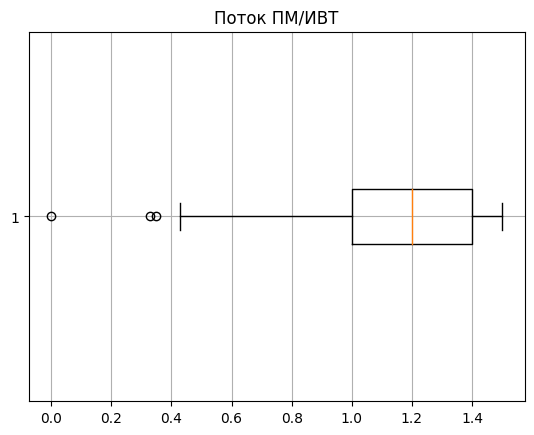

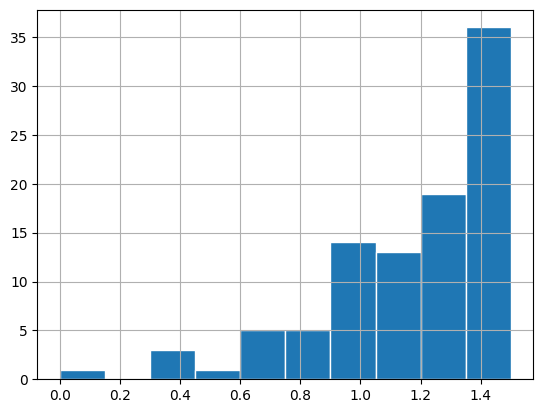

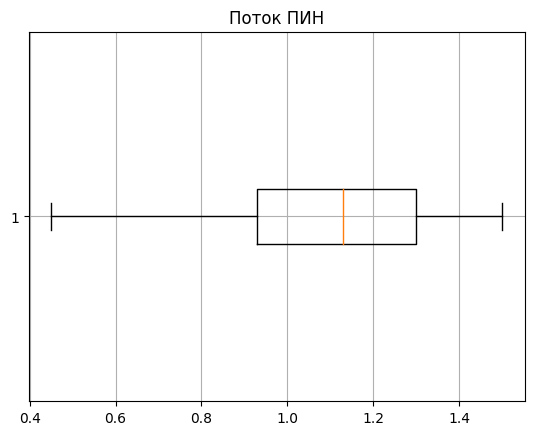

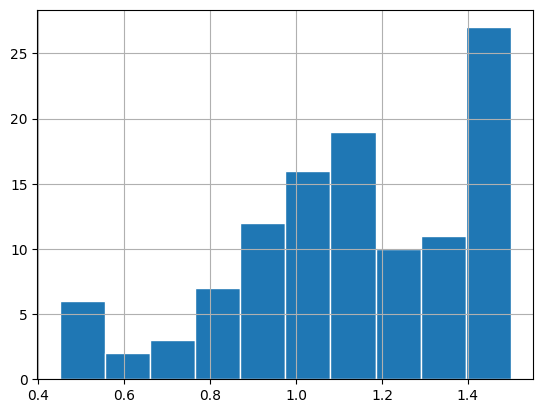

In [5]:
# номер варианта
var = 3

# обрабатывая данные
data = pd.read_excel('Data_9_2_(8_1).ods')
table = pd.DataFrame(data)

# получаю выборки
sample_1 = parse_sample(table[table.columns[var]].dropna())
sample_2 = parse_sample(table[table.columns[var + 17]].dropna())

# вывод выборочных характеристик на экран
print("Поток ПМ/ИВТ:")
print(f"Выборочное математическое ожидание: {np.mean(sample_1)}")
print(f"Выборочная дисперсия: {np.var(sample_1)}")
print()
print("Поток ПИН:")
print(f"Выборочное математическое ожидание: {np.mean(sample_2)}")
print(f"Выборочная дисперсия: {np.var(sample_2)}")
print()

# строю боксплоты и гистограммы
plt.figure()
plt.title("Поток ПМ/ИВТ")
plt.grid(True)
plt.boxplot(sample_1, vert=False)
plt.figure()
plt.grid(True)
plt.hist(sample_1, edgecolor='w')

plt.figure()
plt.title("Поток ПИН")
plt.grid(True)
plt.boxplot(sample_2, vert=False)
plt.figure()
plt.grid(True)
plt.hist(sample_2, edgecolor='w')

# использую критерий
pvalue = wilcoxon_test(sample_1, sample_2)[1]
print(f"P значение: {pvalue}")

При $\alpha < p$ гипотеза о равенстве характеристик положения принимается. 